In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [3]:
food = pd.read_excel('final_food_01.xlsx', encoding='utf-8')
food  = food.fillna(0.0)
food.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,1,곡류 및 그 제품,"고량미,고량미, 알곡",100,349.0,67.80,10.10,3.70,0.0,0.0,0.0,0.0,0,2001
1,2,곡류 및 그 제품,"과자,스넥과자, 유아용과자",100,129.9,20.13,3.54,3.96,0.0,57.6,0.0,0.0,0,2006
2,4,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,348.0,64.90,13.20,8.20,0.0,4.0,0.0,0.0,0,2017
3,6,곡류 및 그 제품,"귀리(겉귀리), 도정곡, 생것",100,332.0,73.50,11.40,3.70,0.0,2.0,0.0,0.0,0,2017
4,8,곡류 및 그 제품,"귀리(쌀귀리), 도정곡, 생것",100,334.0,70.40,14.30,3.80,0.0,3.0,0.0,0.0,0,2017


In [10]:
food_num = food['번호']
amount =food['1회제공량 (g)']
kcal = food['열량 (kcal)']
cardo = food['탄수화물 (g)']
protain = food['단백질 (g)']
fatt = food['지방 (g)']

- 탄수화물(23) / 단백질 (2)  <-- 11.5
- 단백질 (2) / 탄수화물(23) <-- 0.0869565

In [25]:
a = cardo / protain
temp_a = []
for i in range(len(a)):
    if a[i] > 11.5:
        temp_a.append(food.loc[i, :])

In [29]:
result_a = pd.DataFrame(temp_a)
result_a = result_a.reset_index()
result_a.head()

,index,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,7,13,곡류 및 그 제품,"녹두 가공(면류), 녹두국수",100,356.0,87.50,0.20,0.40,0.00,14.0,0.0,0.00,0,2017
1,23,42,곡류 및 그 제품,"멥쌀 가공(가루), 백미가루",100,362.0,78.50,6.20,0.90,0.10,2.0,0.0,-0.29,0,2017
2,25,45,곡류 및 그 제품,"멥쌀 가공(과자류), 쌀과자",100,469.0,78.20,3.20,15.90,0.00,224.0,0.0,0.00,0,2017
3,26,47,곡류 및 그 제품,"멥쌀 가공(과자류), 쌀엿강정",100,395.0,89.96,4.11,2.13,35.58,4.0,0.0,1.12,0,2017
4,27,48,곡류 및 그 제품,"멥쌀 가공(과자류), 튀김쌀과자",100,139.5,21.36,1.71,5.25,0.00,147.0,0.0,0.00,0,2011


In [30]:
result_a.to_excel('result_a.xlsx')

In [35]:
b = protain / cardo
temp_b = []
for i in range(len(b)):
    if b[i] > 0.0869:
        temp_b.append(food.loc[i, :])
result_b = pd.DataFrame(temp_b)
result_b = result_b.reset_index()
result_b.head()
result_b.to_excel('result_b.xlsx')

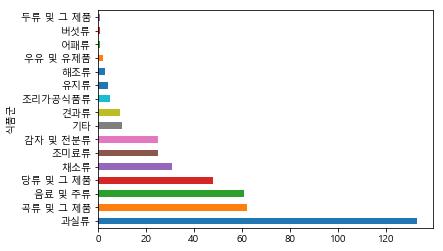

In [37]:
kind_count_a = result_a.groupby(result_a['식품군']).size()
kind_count_a = kind_count_a.sort_values(ascending = False)
kind_count_a.plot.barh()

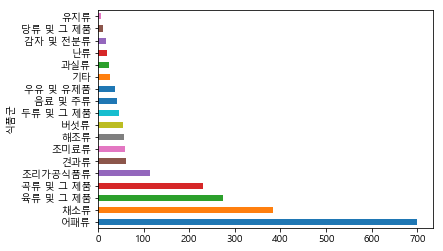

In [38]:
kind_count_b = result_b.groupby(result_b['식품군']).size()
kind_count_b = kind_count_b.sort_values(ascending = False)
kind_count_b.plot.barh()

## 단순히 모든 식품군을 가지고 각 식품군의 비율을 나눠봄

- 어육류 군 
1. 고어육륙 단백질 8, 지방 2 
2. 중 어육류 단백질 8, 지방 5
3. 저 어육류 단백질 8, 지방 8

1. 저어육류 오차 5% 시 0.25 플러스 마이너스 0.0125

- 즉 0.2375 ~ 0.2625


In [55]:
low_beef = fatt / protain
temp_low_beef = []
for i in range(len(low_beef)):
    if low_beef[i] >= 0.2375:
        if low_beef[i] <= 0.2625:
            temp_low_beef.append(food.loc[i, :])
result_low_beef = pd.DataFrame(temp_low_beef)
result_low_beef = result_low_beef.reset_index()

result_low_beef.to_excel('result_low_beef.xlsx')
del result_low_beef['index']
result_low_beef.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,22,곡류 및 그 제품,"라면,봉지면, 진라면, 매운맛(오뚜기)",100,369.0,78.69,8.59,2.22,0.00,1338.0,0.0,1.44,0,2017
1,28,곡류 및 그 제품,"메밀 가공(가루), 메밀가루",100,355.0,71.36,12.96,3.29,0.37,1.0,0.0,0.70,0,2017
2,40,곡류 및 그 제품,"메밀, 도정곡, 생것",100,345.0,67.84,13.64,3.38,0.50,1.0,0.0,0.71,0,2017
3,91,곡류 및 그 제품,"멥쌀 가공(밥죽류), 현미, 미음",100,20.0,4.40,0.40,0.10,0.10,0.0,0.0,-0.02,0,2017
4,376,곡류 및 그 제품,"시리얼, 쌀",100,390.0,86.99,6.65,1.68,21.72,625.0,0.0,0.44,0,2017


2. 중어육류 오차 5% 시 0.625 플러스 마이너스 0.03125

- 즉 0.59375 ~ 0.65625

In [52]:
mid_beef = fatt / protain
temp_mid_beef = []
for i in range(len(mid_beef)):
    if mid_beef[i] >= 0.59375:
        if mid_beef[i] <= 0.65625:
            temp_mid_beef.append(food.loc[i, :])
result_mid_beef = pd.DataFrame(temp_mid_beef)
result_mid_beef = result_mid_beef.reset_index()

result_mid_beef.to_excel('result_mid_beef.xlsx')

del result_mid_beef['index']
result_mid_beef.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,4,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,348.0,64.9,13.2,8.2,0.0,4.0,0.0,0.0,0,2017
1,120,곡류 및 그 제품,"밀 가공(가루), 팬케이크가루",100,402.0,75.9,7.9,4.9,0.0,735.0,0.0,0.0,0,2017
2,466,곡류 및 그 제품,"찹쌀 가공(떡류), 약식",100,244.0,52.3,3.7,2.2,0.0,289.0,0.0,0.0,0,2017
3,503,곡류 및 그 제품,"피자, 슈퍼슈프림, 냉동",100,233.0,30.4,11.3,7.3,0.0,583.0,0.0,0.0,0,2017
4,508,곡류 및 그 제품,"피자,슈프림, 냉동품",100,233.0,30.4,11.3,7.3,0.0,583.0,0.0,0.0,0,2017


1. 고어육류 오차 5%시 1
플러스 마이너스 0.05
0.95 - 1.05

In [56]:
high_beef = fatt / protain
temp_high_beef = []
for i in range(len(high_beef)):
    if high_beef[i] >= 0.95:
        if high_beef[i] <= 1.05:
            temp_high_beef.append(food.loc[i, :])
result_high_beef = pd.DataFrame(temp_high_beef)
result_high_beef = result_high_beef.reset_index()

result_high_beef.to_excel('result_high_beef.xlsx')

del result_high_beef['index']
result_high_beef.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,136,곡류 및 그 제품,"밀 가공(과자류), 센베이, 김",100,420.0,82.80,6.70,6.90,0.00,150.0,0.0,0.0,0,2017
1,506,곡류 및 그 제품,"피자,버섯, 냉동품",100,348.0,35.40,16.35,15.60,0.00,816.0,0.0,0.0,0,2001
2,512,곡류 및 그 제품,"피자,피자",100,403.5,45.15,18.15,17.85,0.00,597.0,0.0,0.0,0,2006
3,595,감자 및 전분류,"전분, 칡뿌리전분",100,347.0,85.60,0.20,0.20,0.00,2.0,0.0,0.0,0,2017
4,640,당류 및 그 제품,"사탕, 박하사탕",100,394.0,98.59,0.02,0.02,41.67,0.0,0.0,0.0,0,2017


채소군
1. 탄수화물 3
2. 단백질 2 

단백질 / 탄수화물 < === 0.6667
- 오차 5% = > 0.033335

### 칼로리가 높아져도 단백질/ 탄수화물의 비는 부동일것이다.

In [58]:
# 0.700035
# 0.633365

vegitable = protain / cardo
temp_vegitable = []
for i in range(len(vegitable)):
    if vegitable[i] >= 0.633365:
        if vegitable[i] <= 0.700035:
            temp_vegitable.append(food.loc[i, :])
result_vegitable = pd.DataFrame(temp_vegitable)
result_vegitable = result_vegitable.reset_index()

result_vegitable.to_excel('result_vegitable.xlsx')

del result_vegitable['index']
result_vegitable.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,334,곡류 및 그 제품,"샌드위치, 소고기",100,244.0,22.21,15.17,10.30,3.84,653.0,30.0,3.40,0,2017
1,819,견과류,"땅콩 가공(기타), 조미품",100,593.0,27.50,18.60,50.40,0.00,210.0,0.0,0.00,0,2017
2,830,견과류,"땅콩, 삶은것",100,318.0,21.26,13.50,22.01,2.47,751.0,0.0,3.06,0,2017
3,834,견과류,"땅콩, 중립종, 마른것",100,544.0,29.10,20.30,43.00,0.00,2.0,0.0,0.00,0,2017
4,842,견과류,"마카다미아넛 가공(기타), 조미품",100,720.0,12.20,8.30,76.70,3.80,190.0,0.0,12.46,0,2017


지방군
지방이 5인것 
5 의 5%

In [59]:
# 0.25
#4.75 - 5.25
temp_fatty = []
for i in range(len(fatt)):
    if fatt[i] >= 4.75:
        if fatt[i] <= 5.25:
            temp_fatty.append(food.loc[i, :])
result_fatty = pd.DataFrame(temp_fatty)
result_fatty = result_fatty.reset_index()

result_fatty.to_excel('result_fatty.xlsx')

del result_fatty['index']
result_fatty.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,14,곡류 및 그 제품,"대두 가공(과자류), 엿강정",100,135.3,11.73,11.31,4.80,0.00,1.5,0.00,0.00,0,2011
1,48,곡류 및 그 제품,"멥쌀 가공(과자류), 튀김쌀과자",100,139.5,21.36,1.71,5.25,0.00,147.0,0.00,0.00,0,2011
2,120,곡류 및 그 제품,"밀 가공(가루), 팬케이크가루",100,402.0,75.90,7.90,4.90,0.00,735.0,0.00,0.00,0,2017
3,195,곡류 및 그 제품,"밀 가공(면류), 중국국수, 건면",100,356.0,67.10,10.30,5.20,0.90,2700.0,2.00,1.26,0,2017
4,233,곡류 및 그 제품,"밀 가공(빵류), 모닝빵",100,316.0,58.99,9.06,4.91,11.33,260.0,8.77,2.33,0,2017


## 과일군 (탄수화물 [당질] 12)

In [60]:
# 12
# 0.6
#11.4 - 12.6
temp_fruits = []
for i in range(len(cardo)):
    if cardo[i] >= 11.4:
        if cardo[i] <= 12.6:
            temp_fruits.append(food.loc[i, :])
result_fruits = pd.DataFrame(temp_fruits)
result_fruits = result_fruits.reset_index()

result_fruits.to_excel('result_fruits.xlsx')

del result_fruits['index']
result_fruits.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,14,곡류 및 그 제품,"대두 가공(과자류), 엿강정",100,135.3,11.73,11.31,4.8,0.00,1.5,0.0,0.00,0,2011
1,409,곡류 및 그 제품,"옥수수 가공(면류), 옥수수묵",100,55.0,12.60,1.10,0.0,0.00,28.0,0.0,0.00,0,2017
2,734,두류 및 그 제품,"대두 가공(두부류), 비지",100,74.0,11.70,3.50,1.5,0.00,5.0,0.0,0.00,0,2017
3,756,두류 및 그 제품,"대두, 노란콩, 삶은것",100,201.0,12.02,17.82,9.5,2.57,4.0,0.0,1.33,0,2017
4,842,견과류,"마카다미아넛 가공(기타), 조미품",100,720.0,12.20,8.30,76.7,3.80,190.0,0.0,12.46,0,2017


## 우유군( 고 탄 10 단 6 지 7, 저 탄 10, 단 6 , 지 2)

- 탄수화물과 단백질의 함량이 동일하며 지방의 차이만을 보임